<a href="https://colab.research.google.com/github/ardioputra/decisiontree/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Pembuatan Model***

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df = df.rename(columns={'SepalLengthCm':'PanjangKelopak','SepalWidthCm':'LebarKelopak',
                   'PetalLengthCm':'PanjangDaun','PetalWidthCm':'LebarDaun','Species':'Spesies'})

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [16]:
from sklearn.metrics import accuracy_score
predy = model.predict(X_test)
akurasi = accuracy_score(predy, y_test)

print('Akurasi: ', akurasi)

Akurasi:  0.9666666666666667


#***Masukan sesuai dengan nilai yang diinginkan***

In [17]:
PanjangKelopak = 6.2
LebarKelopak = 3.4
PanjangDaun = 5.4
LebarDaun = 2.3

In [18]:
hasil = model.predict([[PanjangKelopak, 
                        LebarKelopak, 
                        PanjangDaun, 
                        LebarDaun]])[0]
print('Jenis Iris adalah', hasil)

Jenis Iris adalah Iris-virginica


#***Cara melihat kerangka pohon keputusan***

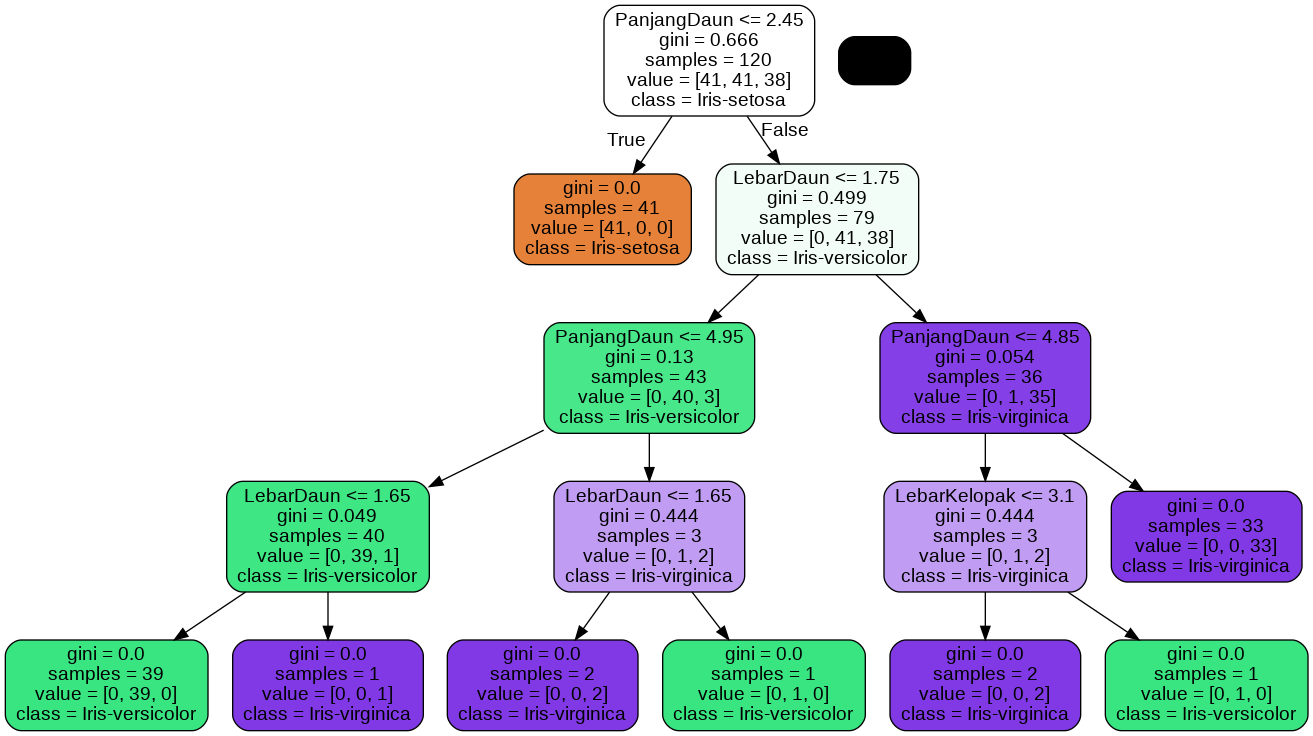

In [19]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

export_graphviz(
    model,
    out_file = 'graph_model.dot',
    feature_names = ['PanjangKelopak','LebarKelopak','PanjangDaun','LebarDaun'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded = True,
    filled = True
)

(graph,) = pydot.graph_from_dot_file('graph_model.dot')
graph.write_png('graph_model.png')

Image('graph_model.png')